In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from astropy import units as u
from astropy import coordinates as coords
from astroquery.simbad import Simbad
import astroquery
plt.style.use("fivethirtyeight")

In [5]:
import gwb

In [6]:
tgas = gwb.TGASData("/Users/semyeong/data/gaia/tgas_source/stacked_tgas.fits")

In [7]:
df = pd.read_csv("../data/targets.csv")
print(len(df))

45


In [8]:
df.head(3)

,tgas_row,tgas_ra,tgas_dec,tgas_distance,gx,gy,gz,tgas_glon,tgas_glat,tgas_gmag,hip,tyc,hip_tyc_id,source_id,tmass_j
0,382720,204.863461,61.061727,102.407820,-22.697253,53.998667,84.002025,112.798467,55.111792,11.724152,NaN,b'4164-274-1',TYC 4164-274-1,1662855584317183744,10.187
1,357377,210.589752,52.417741,94.271430,-7.874400,44.365174,82.805964,100.064644,61.447334,10.153631,NaN,b'3471-333-1',TYC 3471-333-1,1512773174838690176,9.033
2,368772,223.270036,51.261152,102.577721,2.282405,56.244648,85.752662,87.676213,56.717754,9.766224,NaN,b'3480-1209-1',TYC 3480-1209-1,1593570580647402880,8.797


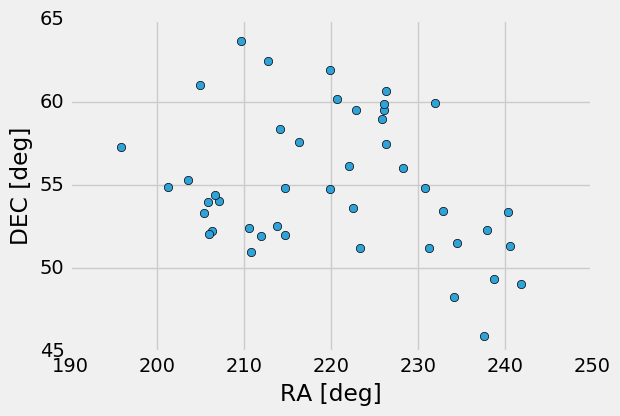

In [9]:
plt.plot(df.tgas_ra, df.tgas_dec, 'o');
plt.xlabel("RA [deg]");
plt.ylabel("DEC [deg]");

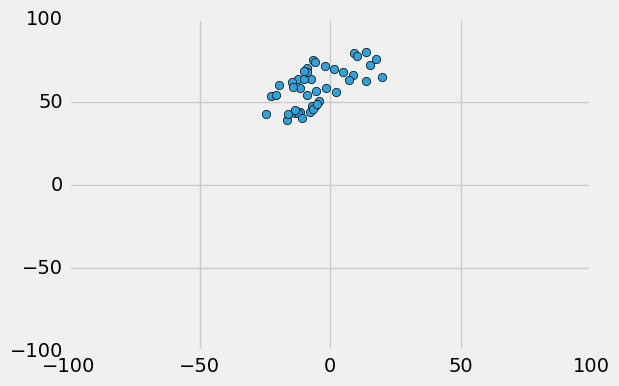

In [10]:
plt.plot(df.gx, df.gy, 'o');
# plt.xlabel("GLON [deg]");
# plt.ylabel("GLAT [deg]");
plt.xlim(-100,100);
plt.ylim(-100,100);

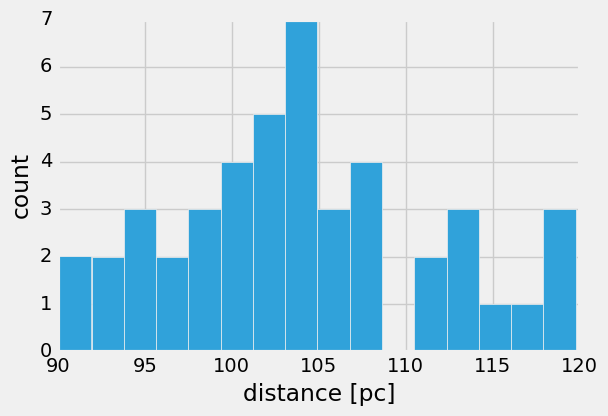

In [11]:
plt.hist(df.tgas_distance, 16);
plt.xlabel("distance [pc]");
plt.ylabel("count")

In [12]:
customSimbad = Simbad()
customSimbad.add_votable_fields('sptype')
customSimbad.add_votable_fields('orv')
customSimbad.add_votable_fields('bibcodelist(1850-2017)')

In [13]:
for field in ['rv_value', 'rvel', 'gcrv', 'orv']:
    customSimbad.get_field_description(field)

Radial velocity value. Eventually translated from a redshift
Radial velocities of galaxies
General Catalogue of Radial Velocities
oRV stellar radial velocities (will shortly replace 
              the GCRV measurements.


In [14]:
result = customSimbad.query_objects(df.hip_tyc_id)

In [15]:
result['MAIN_ID', 'oRV_RVel',
 'oRV_Q',
 'oRV_Nmes',
 'oRV_Rem',
 'oRV_Orig',
 'oRV_Dis',
 'oRV_bibcode',]

MAIN_ID,oRV_RVel,oRV_Q,oRV_Nmes,oRV_Rem,oRV_Orig,oRV_Dis,oRV_bibcode
,km / s,,,,,a / mm,
object,float32,str1,int32,object,str2,int32,str19
TYC 4164-274-1,--,,0,,,0,
TYC 3471-333-1,--,,0,,,0,
BD+51 1966,--,,0,,,0,
HR 5345,-15.0,C,4,,##,0,1953GCRV..C......0W
TYC 3489-1148-1,--,,0,,,0,
TYC 3470-485-1,--,,0,,,0,
HD 234061,--,,0,,,0,
TYC 3868-177-1,--,,0,,,0,


In [16]:
result.sort('BIBLIST_1850_2017')
result['MAIN_ID', 'SP_TYPE', 'BIBLIST_1850_2017']

/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/astropy/table/column.py:1096: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  ma.MaskedArray.__setitem__(self, index, value)


MAIN_ID,SP_TYPE,BIBLIST_1850_2017
object,object,int32
TYC 4164-274-1,,0
TYC 3851-600-1,,0
TYC 3867-1373-1,,0
TYC 3861-1374-1,,0
TYC 4173-609-1,,0
TYC 4174-1117-1,,0
HD 238351,G0,0
TYC 3877-725-1,,0
TYC 3860-1483-1,,0


In [17]:
import sys
sys.path.append('../../gaia-wide-binaries/notebooks/')
import tap

class SimbadTAP(tap.TAP_Service):
    def __init__(self, *args, **kwargs):
        host = "simbad.u-strasbg.fr"
        port = 80
        path = "/simbad/sim-tap"
        tap.TAP_Service.__init__(self, host, path, port, *args, **kwargs)

In [18]:
query_template = """
SELECT BIBCode,
       Journal,
       Title,
       Year,
       Volume,
       DOI
FROM ref JOIN has_ref ON oidbibref = oidbib JOIN ident ON has_ref.oidref = ident.oidref
WHERE id = '{}'
ORDER BY Year DESC;
"""

In [19]:
mytap = SimbadTAP()

In [20]:
mytap.get_table_info('ref')

oidbib,bibcode,year,journal,page,last_page,volume,title,doi,nbobject
int64,object,int16,object,int32,int32,int32,object,object,int32


In [21]:
import time

In [22]:
biblist = []
for iden in result['MAIN_ID']:
    print('searching for {}'.format(iden.decode()))
    biblist.append(mytap.query(query_template.format(iden.decode())))
    time.sleep(5)  ## seems that I'm violating some rate limit or something

searching for TYC 4164-274-1
searching for TYC 3851-600-1
searching for TYC 3867-1373-1
searching for TYC 3861-1374-1
searching for TYC 4173-609-1
searching for TYC 4174-1117-1
searching for HD 238351
searching for TYC 3877-725-1
searching for TYC 3860-1483-1
searching for TYC 3486-1405-1
searching for TYC 3471-233-1
searching for TYC 4180-573-1
searching for TYC 3869-656-1
searching for HD 234065
searching for TYC 3496-1082-1
searching for HD 238423
searching for TYC 3868-177-1
searching for HD 234061
searching for TYC 3470-485-1
searching for TYC 3489-1148-1
searching for TYC 3497-1053-1
searching for BD+51  1966
searching for TYC 3471-333-1
searching for TYC 3490-1083-1
searching for TYC 3875-762-1
searching for BD+60  1587
searching for BD+49  2434
searching for HD 113491
searching for BD+56  1762
searching for HD 125259
searching for HD 137589
searching for TYC 3867-2-1
searching for HD 135501
searching for NAME Stella Ludoviciana
searching for HD 145145
searching for HD 133909
se

In [23]:
# add which object's reference it is
for i, t in enumerate(biblist):
    t['hip_tyc_id'] = [df.hip_tyc_id[i] for j in range(len(t))]

In [32]:
from astropy import table

In [24]:
dfBib = pd.concat([t.to_pandas() for t in biblist])

In [25]:
print("total number of refs = {:d}".format(len(dfBib)))
print("total number of unique refs = {:d}".format(dfBib.bibcode.unique().size))

total number of refs = 389
total number of unique refs = 230


In [30]:
dfBib.index = range(len(dfBib))  # re-index

In [32]:
dfBib.to_csv("../data/target_bib.csv", index=False)

In [45]:
df.columns

Index(['tgas_row', 'tgas_ra', 'tgas_dec', 'tgas_distance', 'gx', 'gy', 'gz',
       'tgas_glon', 'tgas_glat', 'tgas_gmag', 'hip', 'tyc', 'hip_tyc_id',
       'source_id', 'tmass_j'],
      dtype='object')

In [36]:
from astropy import table
table.Table({"title":dfBib[['hip_tyc_id', 'title']]}).show_in_browser()